# Clustering Mini-project Wk 10

Aaron Palumbo

In [49]:
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt

import matplotlib.pyplot as plt

import os

%matplotlib inline

In [32]:
# Load and parse the data
data = sc.textFile("file://" + os.getcwd() + "/birch3.txt")
parsedData = data.map(lambda line: array([float(x) for x in line.split(' ') if len(x) > 0]))

In [36]:
# Build the model (cluster the data)
clusters = KMeans.train(parsedData, 100, maxIterations=10,
                       runs=10, initializationMode="random")
clusters.centers()

In [54]:
clusters.centers[:20]

[array([ 286327.22782609,  509506.95304348]),
 array([ 451499.58044164,  507332.24921136]),
 array([ 518832.56537102,  319881.00824499]),
 array([ 141794.8941048 ,  737492.48362445]),
 array([ 606657.91428571,  322288.32380952]),
 array([ 301543.07079646,  653465.95280236]),
 array([ 793598.71523179,  909451.57350993]),
 array([ 489928.27368421,  559633.27464115]),
 array([ 408937.58517211,  842599.96293027]),
 array([ 362376.3625,  611344.94  ]),
 array([ 650651.08675079,  579117.45662461]),
 array([ 282706.89814815,  875983.3912037 ]),
 array([ 505208.92177914,  438629.03604294]),
 array([ 841327.93340271,  667857.40478668]),
 array([ 687959.        ,  406300.36462094]),
 array([ 428807.1675593 ,  353271.78041316]),
 array([ 268211.74757282,  589058.52427184]),
 array([ 609124.19720624,  141456.37387017]),
 array([ 524969.71443193,  457036.52814739]),
 array([ 156058.83673469,  456516.16326531])]

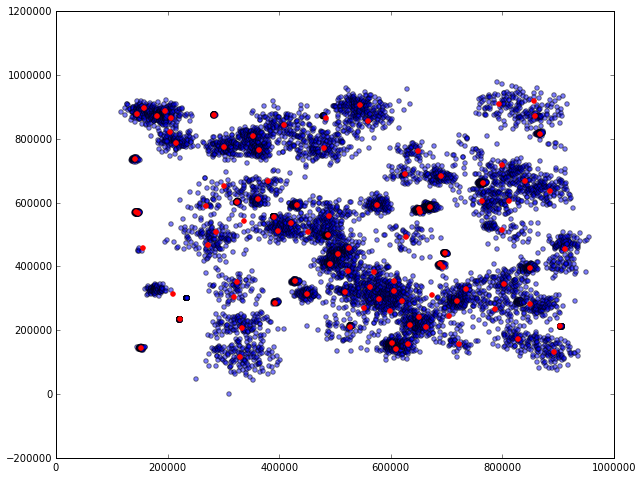

In [53]:
sampledData = parsedData.sample(False, 0.1, 81).collect()
[x, y] = array(sampledData).transpose()
[cx, cy] = array(clusters.centers).transpose()

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x, y, alpha=0.5)
ax.scatter(cx, cy, color="red")